In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Load and save raw data
url = "https://statso.io/wp-content/uploads/2023/06/dynamic_pricing.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/dynamic_pricing.csv", index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
# Examine random rows
df.head(20)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [5]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

## EDA

In [6]:
# Descriptive statistics for numeric types
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


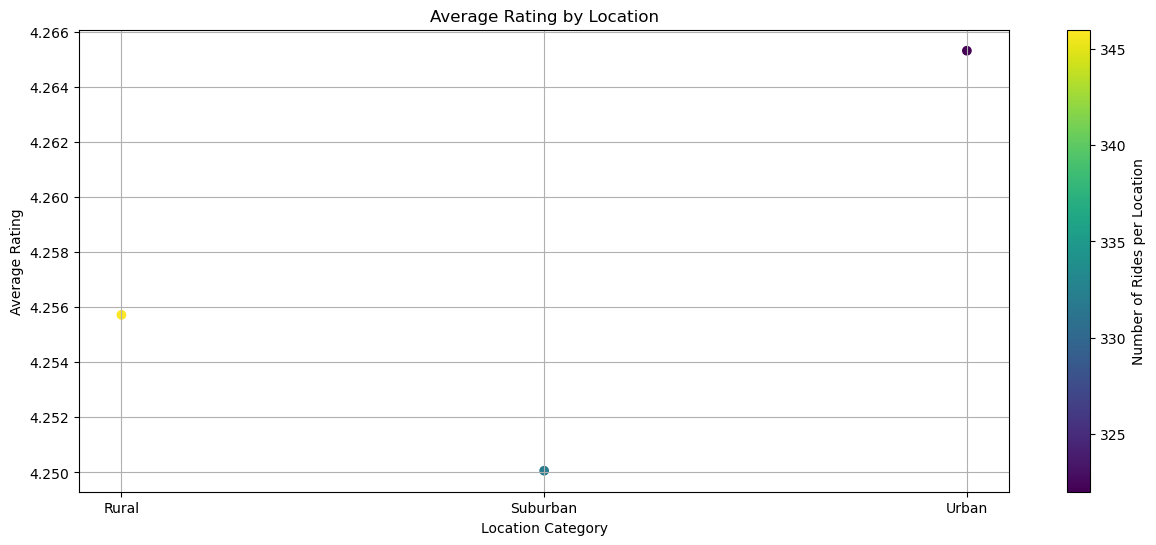

In [7]:
# Calculate average rating per location
df_grouped = df.groupby("Location_Category")["Average_Ratings"].mean().reset_index()

# Scatter plot with Location on X-axis and Average Rating on Y-axis (colored by count)
plt.figure(figsize=(15, 6))
plt.scatter(df_grouped["Location_Category"], df_grouped["Average_Ratings"], c=df["Location_Category"].value_counts(), cmap="viridis")
plt.colorbar(label="Number of Rides per Location")
plt.xlabel("Location Category")
plt.ylabel("Average Rating")
plt.title("Average Rating by Location")
plt.grid(True)
plt.show()

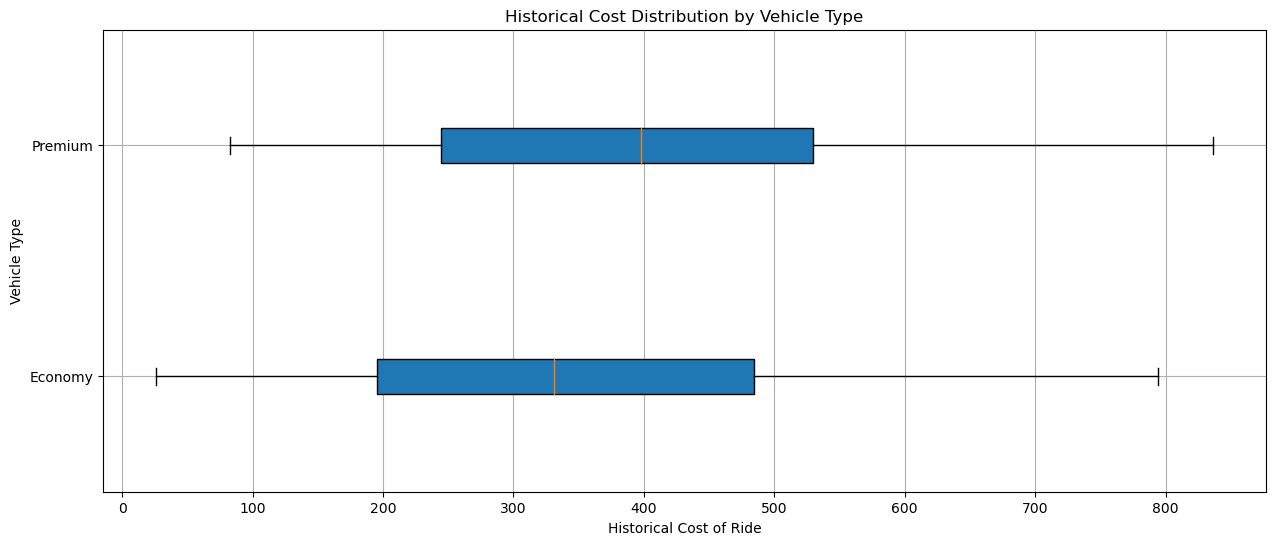

In [8]:
# Historical Cost of Ride Distribution by Vehicle Type
plt.figure(figsize=(15, 6))
plt.boxplot(
    [
        df["Historical_Cost_of_Ride"][df["Vehicle_Type"] == "Economy"],
        df["Historical_Cost_of_Ride"][df["Vehicle_Type"] == "Premium"],
    ],
    labels=["Economy", "Premium"],
    vert=False,  # Vertical boxplots for better comparison
    patch_artist=True,
)
plt.xlabel("Historical Cost of Ride")
plt.ylabel("Vehicle Type")
plt.title("Historical Cost Distribution by Vehicle Type")
plt.grid(True)
plt.show()

In [9]:
# Prepare lists to store results
median_costs = []
q1_values = []
q3_values = []
iqr_values = []
vehicle_types = df["Vehicle_Type"].unique()  # Get unique vehicle types

# Calculate statistics for each vehicle type
for vehicle_type in vehicle_types:
    data_for_type = df[df["Vehicle_Type"] == vehicle_type]["Historical_Cost_of_Ride"]
    median_costs.append(data_for_type.median())
    q1_values.append(data_for_type.quantile(0.25))
    q3_values.append(data_for_type.quantile(0.75))
    iqr_values.append(q3_values[-1] - q1_values[-1])  # Calculate IQR for each type

# Print results for description
for i in range(len(vehicle_types)):
    print(f"Vehicle Type: {vehicle_types[i]}")
    print(f"\tMedian Historical Cost: {median_costs[i]}")
    print(f"\tInterquartile Range (IQR): {iqr_values[i]}")
    print("-" * 70)

Vehicle Type: Premium
	Median Historical Cost: 397.58752710893987
	Interquartile Range (IQR): 285.1861355862775
----------------------------------------------------------------------
Vehicle Type: Economy
	Median Historical Cost: 331.23091745301076
	Interquartile Range (IQR): 288.68380613017325
----------------------------------------------------------------------


**Median Cost:** Premium vehicles have a higher median historical cost ($397.59) compared to Economy vehicles ($331.23). This indicates that rides using Premium vehicles tend to be more expensive overall.

**Distribution Spread:** The interquartile range (IQR) is very similar for both Economy ($288.68) and Premium vehicles ($285.19). This suggests a comparable spread of historical costs within each category. In other words, while Premium vehicles have a higher median cost, the range of observed costs within the Premium category is similar to Economy vehicles.

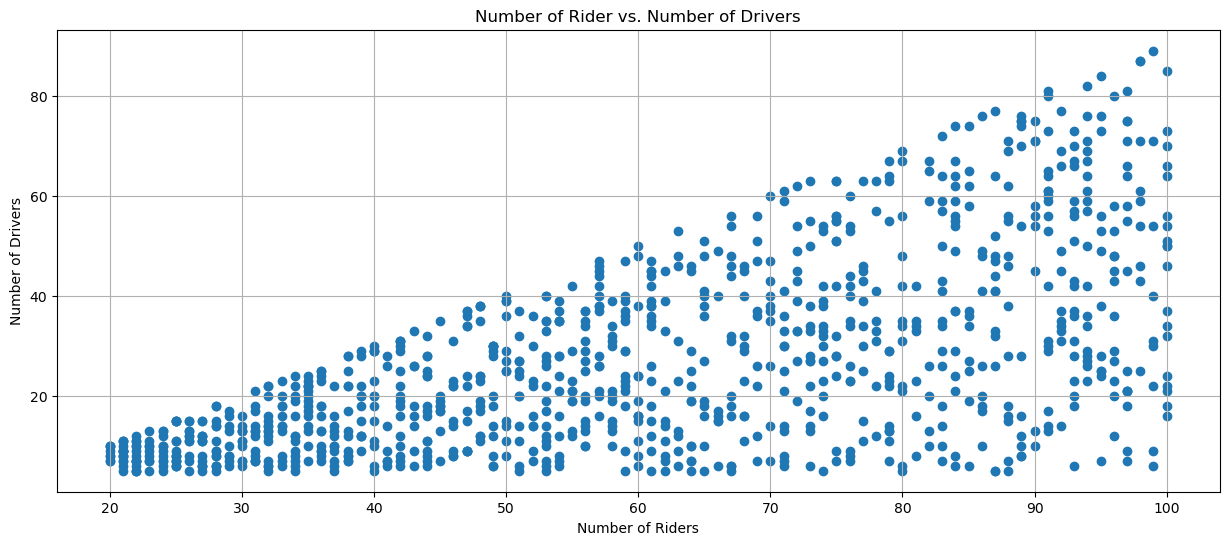

In [10]:
# A Scatter plot of Number_of_Riders vs Number_of_Drivers
plt.figure(figsize=(15, 6))
plt.scatter(df["Number_of_Riders"], df["Number_of_Drivers"])
plt.xlabel("Number of Riders")
plt.ylabel("Number of Drivers")
plt.title("Number of Rider vs. Number of Drivers")
plt.grid(True)
plt.show()

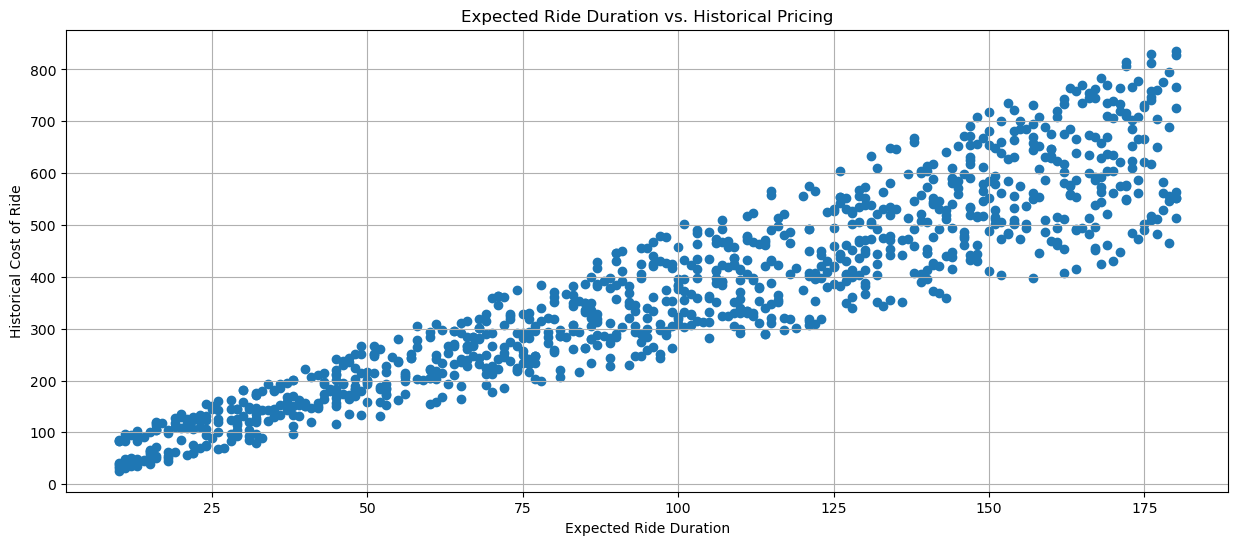

In [11]:
# A Scatter plot of Expected Ride Duration vs Historical Cost
plt.figure(figsize=(15, 6))
plt.scatter(df["Expected_Ride_Duration"], df["Historical_Cost_of_Ride"])
plt.xlabel("Expected Ride Duration")
plt.ylabel("Historical Cost of Ride")
plt.title("Expected Ride Duration vs. Historical Pricing")
plt.grid(True)
plt.show()

#### Correlation Analysis

In [12]:
# Select only the numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
correlation_matrix

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.029265,0.008572,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.039660,0.041204,-0.024418,0.017082
Number_of_Past_Rides,0.029265,0.039660,1.000000,-0.064734,0.030679,0.035859
Average_Ratings,0.008572,0.041204,-0.064734,1.000000,-0.016968,-0.001063
Expected_Ride_Duration,-0.015856,-0.024418,0.030679,-0.016968,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,0.035859,-0.001063,0.927547,1.000000


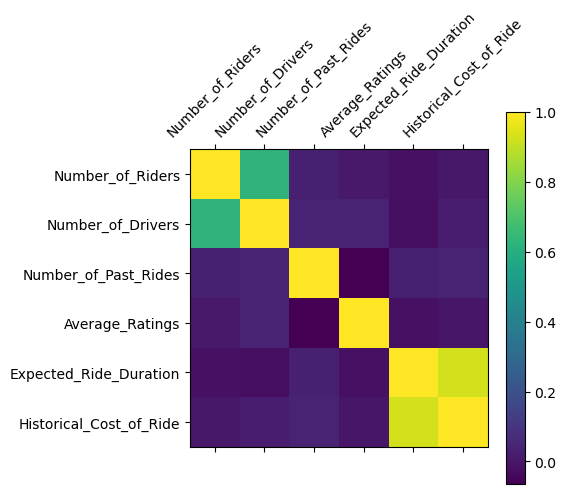

In [13]:
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

From the correlation values:

**Strong Positive Correlation:** Expected_Ride_Duration (0.9275) has a very strong positive correlation with Historical_Cost_of_Ride. This suggests that rides with longer expected durations tend to be priced higher.

**Moderate Positive Correlation:** Number_of_Riders (0.6270) has a moderate positive correlation with Number_of_Drivers. This implies that locations with more riders might also have more drivers available.

**Weak Correlations:** Average_Ratings has weak correlations with most other variables, suggesting little influence on pricing or other factors.